# Practical Lab 6 - Logistic Regression using Iris Dataset

## Problem Statement

The goal is to classify the species of an Iris flower given the dimensions of parts of the flower into two classes virginica and non-virginica.


In [44]:
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

## Importing the dataset

In [33]:
iris_dataset = datasets.load_iris(as_frame=True)
df_iris_dataset = iris_dataset.data
df_iris_dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Segregating the target variable into two classes

In [47]:
df_iris_dataset['target'] = iris_dataset.target
df_iris_dataset['Species Name'] = iris_dataset.target_names[iris_dataset.target]
df_iris_dataset['target'] = df_iris_dataset['Species Name'].map({'virginica': 1, 'versicolor': 0, 'setosa': 0})
df_iris_dataset['Class Name'] = df_iris_dataset['target'].map({1:'Virginica', 0 : 'Non Virginica'})
df_iris_dataset.drop(columns=['Species Name'], axis=1, inplace=True)
df_iris_dataset.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Class Name
0,5.1,3.5,1.4,0.2,0,Non Virginica
1,4.9,3.0,1.4,0.2,0,Non Virginica
2,4.7,3.2,1.3,0.2,0,Non Virginica
3,4.6,3.1,1.5,0.2,0,Non Virginica
4,5.0,3.6,1.4,0.2,0,Non Virginica


## Exploratory Data Analysis

### Descriptive statistics

In [48]:
virginica_class = df_iris_dataset[df_iris_dataset['target'] == 1]
non_virginica_class = df_iris_dataset[df_iris_dataset['target'] == 0]

In [49]:
# Descriptive statistics of Virginica class
virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,50.00000,50.000000,50.000000,50.00000,50.0
mean,6.58800,2.974000,5.552000,2.02600,1.0
std,0.63588,0.322497,0.551895,0.27465,0.0
min,4.90000,2.200000,4.500000,1.40000,1.0
25%,6.22500,2.800000,5.100000,1.80000,1.0
50%,6.50000,3.000000,5.550000,2.00000,1.0
75%,6.90000,3.175000,5.875000,2.30000,1.0
max,7.90000,3.800000,6.900000,2.50000,1.0


In [37]:
# Descriptive statistics of non-virginica class
non_virginica_class.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,100.000000,100.000000,100.000000,100.000000,100.0
mean,5.471000,3.099000,2.861000,0.786000,0.0
std,0.641698,0.478739,1.449549,0.565153,0.0
min,4.300000,2.000000,1.000000,0.100000,0.0
25%,5.000000,2.800000,1.500000,0.200000,0.0
50%,5.400000,3.050000,2.450000,0.800000,0.0
75%,5.900000,3.400000,4.325000,1.300000,0.0
max,7.000000,4.400000,5.100000,1.800000,0.0


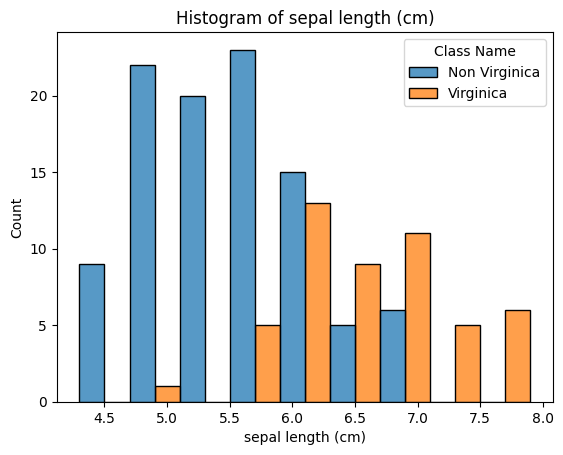

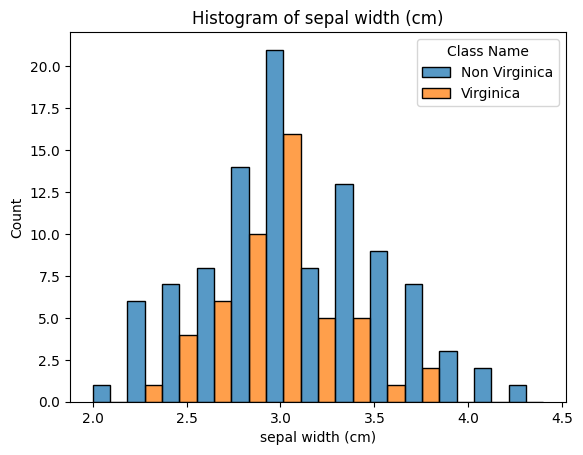

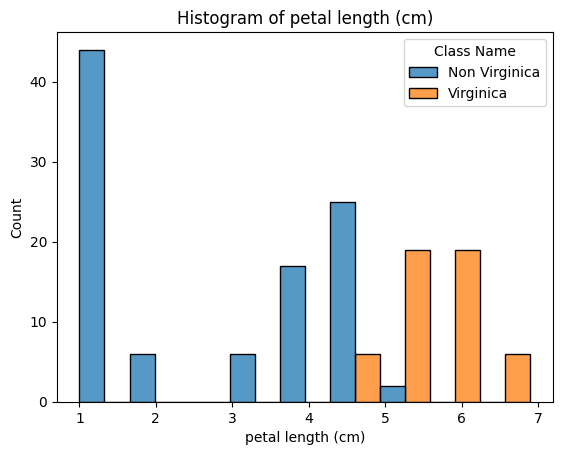

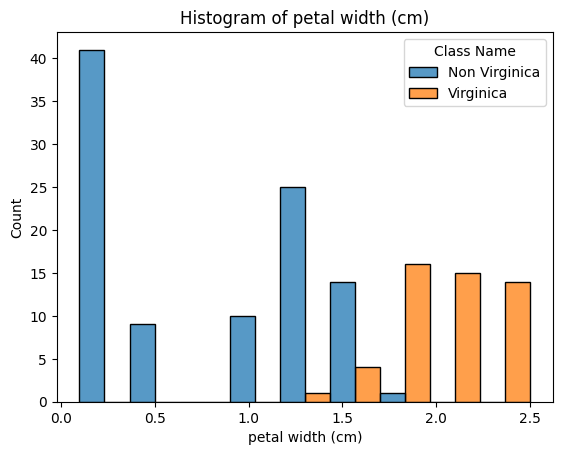

In [54]:
for feature in iris_dataset.feature_names:
    sns.histplot(data=df_iris_dataset, x= feature, hue = "Class Name",multiple="dodge")
    plt.title(f'Histogram of {feature}')
    plt.show()
